Cargar los archivos CSV

In [29]:
import pandas as pd

# Cargar los archivos CSV
calificaciones_df = pd.read_csv('input/calificaciones.csv')
carrera_df = pd.read_csv('input/carrera.csv')
escuelas_df = pd.read_csv('input/escuelas.csv')
estudiantes_df = pd.read_csv('input/estudiantes.csv')

# Ver las primeras filas de cada DataFrame
print("Calificaciones")
display(calificaciones_df.head())
print("Carrera")
display(carrera_df.head())
print("Escuela")
display(escuelas_df.head())
print("Estudiantes")
display(estudiantes_df.head())

Calificaciones


,periodo,clave_alumno,clave_materia,calificacion,tipo_calificacion
0,2001,0,ACB9309,100.0,1
1,2001,0,ACH9322,75.0,1
2,2001,0,ACM9313,0.0,3
3,2001,0,ACM9301,0.0,3
4,2001,0,ACC9326,93.0,1


Carrera


,clave_carrera,nombre,corto
0,0,INGENIERIA INDUSTRIAL,Industrial
1,1,INGENIERIA BIOQUIMICA,Bioquimica
2,2,INGENIERIA MECANICA,Mecanica
3,3,INGENIERIA ELECTRICA,Electrica
4,4,INGENIERIA ELECTRONICA,Electronica


Escuela


,clave,escuela
0,3,COBAES 3(PROFRA. VELINA LEON )
1,4,COBAES 4(PROFR. VICTOR M. RUB)
2,5,COBAES 5(PROFRA. FCA. GUERRER)
3,6,COBAES 6(ING.JOSE HERNANDEZ T)
4,7,COBAES 7(GRAÑ. PABLO MACIAS V)


Estudiantes


,clave_alumno,clave_carrera,sexo,prepa,colonia,municipio,ciudad,ingreso,termino,causa_salida
0,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5
1,248,4,1,125,FRAC.RINCON HYA,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5
2,260,4,1,71,El Walamo,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5
3,261,4,1,107,4 de Marzo,25006.0,"CULIACAN, SIN.",2003.0,2051.0,4
4,262,4,2,2,Los Angeles,25006.0,CULIACAN,2003.0,2053.0,5


Explorar los datos
Verificamos si los datos contienen valores nulos, duplicados, o alguna inconsistencia:

In [30]:
# Verificar si hay valores nulos
print("Valores nulos en calificaciones:\n", calificaciones_df.isnull().sum())
print("Valores nulos en carrera:\n", carrera_df.isnull().sum())
print("Valores nulos en escuelas:\n", escuelas_df.isnull().sum())
print("Valores nulos en estudiantes:\n", estudiantes_df.isnull().sum())

# Verificar si hay duplicados
print("Duplicados en calificaciones:", calificaciones_df.duplicated().sum())
print("Duplicados en carrera:", carrera_df.duplicated().sum())
print("Duplicados en escuelas:", escuelas_df.duplicated().sum())
print("Duplicados en estudiantes:", estudiantes_df.duplicated().sum())

Valores nulos en calificaciones:
 periodo              0
clave_alumno         0
clave_materia        0
calificacion         0
tipo_calificacion    0
dtype: int64
Valores nulos en carrera:
 clave_carrera    0
nombre           0
corto            0
dtype: int64
Valores nulos en escuelas:
 clave      0
escuela    0
dtype: int64
Valores nulos en estudiantes:
 clave_alumno        0
clave_carrera       0
sexo                0
prepa               0
colonia           600
municipio         363
ciudad            287
ingreso             1
termino          5317
causa_salida        0
dtype: int64
Duplicados en calificaciones: 4
Duplicados en carrera: 0
Duplicados en escuelas: 0
Duplicados en estudiantes: 0


Limpieza de los datos

Eliminar duplicados:

In [31]:
# Eliminar duplicados
calificaciones_df = calificaciones_df.drop_duplicates()

Manejo de valores nulos:

In [32]:
# Eliminar las filas que contienen valores nulos en columnas relevantes para el analisis
estudiantes_df = estudiantes_df.dropna(subset=['colonia', 'municipio', 'ciudad', 'ingreso', 'termino', 'prepa'])

Reemplazar valores incorrectos o inconsistentes:

In [33]:
# Reemplazar valores negativos por 0 en calificación
calificaciones_df['calificacion'] = calificaciones_df['calificacion'].apply(lambda x: max(x, 0))


Cambiar formato de columnas de ingreso y termino a string

In [34]:
estudiantes_df['ingreso'] = estudiantes_df['ingreso'].astype(str)
estudiantes_df['termino'] = estudiantes_df['termino'].astype(str)

Unir los DataFrames en uno solo para hacer el análisis, usando merge():

In [35]:
# Verificar las columnas de los DataFrames
print(estudiantes_df.columns)
print(escuelas_df.columns)

# Unir estudiantes con carreras
estudiantes_calificaciones_escuelas = pd.merge(estudiantes_df, calificaciones_df, on='clave_alumno', how='left')
estudiantes_carrera = pd.merge(estudiantes_calificaciones_escuelas, carrera_df, on='clave_carrera', how='left')

# Unir con escuelas usando 'clave_carrera' de estudiantes y 'clave' de escuelas
estudiantes_completos = pd.merge(estudiantes_carrera, escuelas_df, left_on='prepa', right_on='clave', how='left')

estudiantes_completos = estudiantes_completos.rename(columns={
    'nombre': 'carrera_nombre',  # Renombrar columna 'nombre' de la tabla carrera
    'corto': 'carrera_nombre_corto',
    'clave': 'preparatoria_clave',
    
    'escuela': 'preparatoria_nombre'  # Renombrar columna 'escuela' de la tabla escuelas
})

# Verificar el resultado
display(estudiantes_completos)


Index(['clave_alumno', 'clave_carrera', 'sexo', 'prepa', 'colonia',
       'municipio', 'ciudad', 'ingreso', 'termino', 'causa_salida'],
      dtype='object')
Index(['clave', 'escuela'], dtype='object')


,clave_alumno,clave_carrera,sexo,prepa,colonia,municipio,ciudad,ingreso,termino,causa_salida,periodo,clave_materia,calificacion,tipo_calificacion,carrera_nombre,carrera_nombre_corto,preparatoria_clave,preparatoria_nombre
0,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tBt2,80.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
1,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tBt1,88.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
2,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tGt4,80.0,3.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
3,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tGt5,88.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
4,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2011.0,04tAt3,70.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228782,11569,8,1,118,Santa Natalia,25006.0,CULIACAN,2103.0,2103.0,4,2103.0,AEF1032,0.0,1.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,118.0,UAS (CENTRAL DIURNA)
228783,11840,8,1,95,Las Mañanitas,25006.0,CULIACAN,2103.0,2103.0,4,2103.0,ACA0907,85.0,1.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,95.0,COBAC
228784,11840,8,1,95,Las Mañanitas,25006.0,CULIACAN,2103.0,2103.0,4,2103.0,ACC0906,83.0,1.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,95.0,COBAC
228785,11840,8,1,95,Las Mañanitas,25006.0,CULIACAN,2103.0,2103.0,4,2103.0,ACF0901,0.0,3.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,95.0,COBAC


Eliminar filas con valores nulos en columnas clave (calificación, materia, etc.)

In [36]:
# Eliminar filas con valores nulos en las columnas de calificaciones
estudiantes_completos_limpios = estudiantes_completos.dropna(subset=['periodo', 'clave_materia', 'calificacion', 'tipo_calificacion'])

# Guardar el DataFrame limpio
estudiantes_completos_limpios.to_csv('estudiantes_completos_limpios.csv', index=False)


In [37]:
# Cargar el archivo CSV para visualizarlo
estudiantes_completos_guardados = pd.read_csv('estudiantes_completos_limpios.csv')

# Ver las primeras filas
display(estudiantes_completos_guardados)


,clave_alumno,clave_carrera,sexo,prepa,colonia,municipio,ciudad,ingreso,termino,causa_salida,periodo,clave_materia,calificacion,tipo_calificacion,carrera_nombre,carrera_nombre_corto,preparatoria_clave,preparatoria_nombre
0,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tBt2,80.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
1,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tBt1,88.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
2,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tGt4,80.0,3.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
3,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2003.0,04tGt5,88.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
4,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5,2011.0,04tAt3,70.0,1.0,INGENIERIA ELECTRONICA,Electronica,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228731,11569,8,1,118,Santa Natalia,25006.0,CULIACAN,2103.0,2103.0,4,2103.0,AEF1032,0.0,1.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,118.0,UAS (CENTRAL DIURNA)
228732,11840,8,1,95,Las Mañanitas,25006.0,CULIACAN,2103.0,2103.0,4,2103.0,ACA0907,85.0,1.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,95.0,COBAC
228733,11840,8,1,95,Las Mañanitas,25006.0,CULIACAN,2103.0,2103.0,4,2103.0,ACC0906,83.0,1.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,95.0,COBAC
228734,11840,8,1,95,Las Mañanitas,25006.0,CULIACAN,2103.0,2103.0,4,2103.0,ACF0901,0.0,3.0,INGENIERIA EN TECNOLOGIAS DE LA INFORMACION Y ...,TIC,95.0,COBAC


### Agrupar los datos para facilitar el analisis
se crean columnas de agregacion para analizar el desempeño global de cada alumno
facilitando la comparación entre estudiantes segun sus características

In [38]:
# Crear columnas de agregación
datos_agrupados = estudiantes_completos.groupby('clave_alumno').agg(
    materias_aprobadas=('calificacion', lambda x: (x >= 70).sum()),
    materias_reprobadas=('calificacion', lambda x: (x < 70).sum()),
    materias_totales=('calificacion', 'size'),
    promedio_calificaciones=('calificacion', 'mean'),
    desviacion_calificaciones=('calificacion', 'std'),
    duracion_estudios=('periodo', lambda x: len(set(x))),
    causa_salida=('causa_salida', 'first'),
    sexo=('sexo', 'first'),
    prepa=('preparatoria_clave', 'first'),
    prepa_nombre=('preparatoria_nombre', 'first'),
    carrera=('carrera_nombre_corto', 'first'),
    ciudad=('ciudad', 'first'),
    colonia=('colonia', 'first')
).reset_index()

# Revisar el resultado
display(datos_agrupados)


,clave_alumno,materias_aprobadas,materias_reprobadas,materias_totales,promedio_calificaciones,desviacion_calificaciones,duracion_estudios,causa_salida,sexo,prepa,prepa_nombre,carrera,ciudad,colonia
0,1,6,4,10,50.300000,43.815396,2,4,1,39.0,COBAES 39(PROFR. JOSE ROMERO ),Industrial,CULIACAN,Villa de Guadalupe
1,2,10,6,16,55.125000,45.070131,3,4,1,39.0,COBAES 39(PROFR. JOSE ROMERO ),Industrial,CULIACAN,Las Mañanitas
2,3,54,5,59,78.644068,25.825517,10,5,1,NaN,None,Industrial,CULIACAN,Morelos
3,4,48,16,64,58.765625,35.171571,13,4,2,36.0,COBAES 36(JOSE C.VALADEZ ROCH),Industrial,CUALIACAN,El Walamo
4,5,9,1,10,81.900000,29.990554,2,4,2,58.0,COBAES 58(ING.HERIBERTO VALDE),Industrial,CULIACAN,Las Granjas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6161,11801,0,4,4,0.000000,0.000000,1,4,1,127.0,UAS (NAVOLATO),Sistemas,NAVOLATO,Alcanfores
6162,11829,1,4,5,20.000000,44.721360,1,4,1,71.0,CONALEP (CULIACAN II),Sistemas,CULIACAN,Pemex
6163,11840,2,2,4,42.000000,48.504295,1,4,1,95.0,COBAC,TIC,CULIACAN,Las Mañanitas
6164,11842,5,1,6,64.500000,32.946927,1,4,1,NaN,None,Electronica,GUAMUCHIL,Militar


### Preprocesamiento para random forest
Crear variable categorica para campos no numericos que son necesarios en el analisis

In [39]:
# Codificación de variables categóricas
from sklearn.preprocessing import LabelEncoder

le_carrera = LabelEncoder()
le_ciudad = LabelEncoder()
le_colonia = LabelEncoder()

# Aplicamos la codificación
datos_agrupados['carrera_codificada'] = le_carrera.fit_transform(datos_agrupados['carrera'])
datos_agrupados['ciudad_codificada'] = le_ciudad.fit_transform(datos_agrupados['ciudad'])
datos_agrupados['colonia_codificada'] = le_colonia.fit_transform(datos_agrupados['colonia'])

display(datos_agrupados)

,clave_alumno,materias_aprobadas,materias_reprobadas,materias_totales,promedio_calificaciones,desviacion_calificaciones,duracion_estudios,causa_salida,sexo,prepa,prepa_nombre,carrera,ciudad,colonia,carrera_codificada,ciudad_codificada,colonia_codificada
0,1,6,4,10,50.300000,43.815396,2,4,1,39.0,COBAES 39(PROFR. JOSE ROMERO ),Industrial,CULIACAN,Villa de Guadalupe,3,61,558
1,2,10,6,16,55.125000,45.070131,3,4,1,39.0,COBAES 39(PROFR. JOSE ROMERO ),Industrial,CULIACAN,Las Mañanitas,3,61,363
2,3,54,5,59,78.644068,25.825517,10,5,1,NaN,None,Industrial,CULIACAN,Morelos,3,61,402
3,4,48,16,64,58.765625,35.171571,13,4,2,36.0,COBAES 36(JOSE C.VALADEZ ROCH),Industrial,CUALIACAN,El Walamo,3,53,190
4,5,9,1,10,81.900000,29.990554,2,4,2,58.0,COBAES 58(ING.HERIBERTO VALDE),Industrial,CULIACAN,Las Granjas,3,61,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6161,11801,0,4,4,0.000000,0.000000,1,4,1,127.0,UAS (NAVOLATO),Sistemas,NAVOLATO,Alcanfores,7,170,54
6162,11829,1,4,5,20.000000,44.721360,1,4,1,71.0,CONALEP (CULIACAN II),Sistemas,CULIACAN,Pemex,7,61,442
6163,11840,2,2,4,42.000000,48.504295,1,4,1,95.0,COBAC,TIC,CULIACAN,Las Mañanitas,8,61,363
6164,11842,5,1,6,64.500000,32.946927,1,4,1,NaN,None,Electronica,GUAMUCHIL,Militar,2,130,397


Volver a revisar que no existan valores nulos en las columnas necesarias para el analisis

In [40]:
datos_agrupados.dropna(subset=['prepa'], inplace=True)
datos_agrupados.to_csv('datos_agrupados.csv', index=False)
display(datos_agrupados)

,clave_alumno,materias_aprobadas,materias_reprobadas,materias_totales,promedio_calificaciones,desviacion_calificaciones,duracion_estudios,causa_salida,sexo,prepa,prepa_nombre,carrera,ciudad,colonia,carrera_codificada,ciudad_codificada,colonia_codificada
0,1,6,4,10,50.300000,43.815396,2,4,1,39.0,COBAES 39(PROFR. JOSE ROMERO ),Industrial,CULIACAN,Villa de Guadalupe,3,61,558
1,2,10,6,16,55.125000,45.070131,3,4,1,39.0,COBAES 39(PROFR. JOSE ROMERO ),Industrial,CULIACAN,Las Mañanitas,3,61,363
3,4,48,16,64,58.765625,35.171571,13,4,2,36.0,COBAES 36(JOSE C.VALADEZ ROCH),Industrial,CUALIACAN,El Walamo,3,53,190
4,5,9,1,10,81.900000,29.990554,2,4,2,58.0,COBAES 58(ING.HERIBERTO VALDE),Industrial,CULIACAN,Las Granjas,3,61,362
5,6,56,1,57,85.368421,14.505703,10,5,1,31.0,COBAES 31(PROFRA.IRMA GARMEND),Industrial,"ELDORADO, CLN",FIDEL VELAZQUEZ,3,116,210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,11786,2,4,6,23.333333,36.147845,1,4,1,467.0,C.B.T.A. 133 (MOCORITO),Sistemas,VILLA JUAREZ,La Higueras,7,243,354
6161,11801,0,4,4,0.000000,0.000000,1,4,1,127.0,UAS (NAVOLATO),Sistemas,NAVOLATO,Alcanfores,7,170,54
6162,11829,1,4,5,20.000000,44.721360,1,4,1,71.0,CONALEP (CULIACAN II),Sistemas,CULIACAN,Pemex,7,61,442
6163,11840,2,2,4,42.000000,48.504295,1,4,1,95.0,COBAC,TIC,CULIACAN,Las Mañanitas,8,61,363


### Exploracion de columnas

                           clave_alumno  materias_aprobadas  \
clave_alumno                   1.000000           -0.543380   
materias_aprobadas            -0.543380            1.000000   
materias_reprobadas           -0.065738           -0.123059   
materias_totales              -0.559186            0.982988   
promedio_calificaciones       -0.500504            0.834158   
desviacion_calificaciones      0.080315           -0.403977   
duracion_estudios             -0.555274            0.947593   
causa_salida                  -0.504657            0.862255   
sexo                          -0.081495            0.179586   
prepa                          0.221500           -0.033236   
carrera_codificada             0.190575           -0.118103   
ciudad_codificada              0.034388           -0.006342   
colonia_codificada             0.024345           -0.002869   

                           materias_reprobadas  materias_totales  \
clave_alumno                         -0.065738   

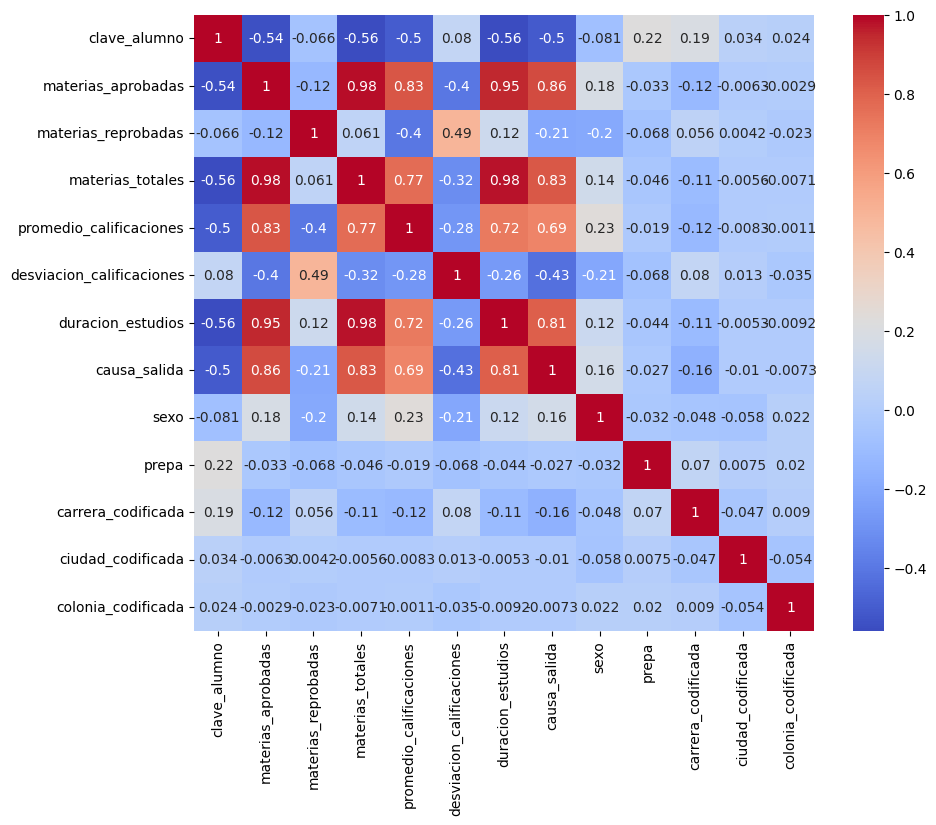

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
columnas_numericas = datos_agrupados.select_dtypes(include=['float64', 'int64']).columns

# Matriz de correlación para las columnas numéricas
correlation_matrix = datos_agrupados[columnas_numericas].corr()
print(correlation_matrix)

# Visualización de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Seleccion de caracteristicas y variable objetivo del random forest

In [16]:
# Selección de las características y el target
x = datos_agrupados[['ciudad_codificada', 'colonia_codificada', 
                           'sexo', 'carrera_codificada', 'prepa', 'materias_totales', 'materias_reprobadas']]

# Variable objetivo: 'materias_aprobadas' (aprobado o reprobado)
y = datos_agrupados['materias_aprobadas']


### Entrenamiento del random forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=20,
    min_samples_split=5,
    random_state=42
)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


Accuracy: 0.5962417470797359
Confusion Matrix:
[[91  1  0 ...  0  0  0]
 [ 8 40  3 ...  0  0  0]
 [ 3  1 37 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  1  0]
 [ 0  0  0 ...  2 12  0]
 [ 0  0  0 ...  0  2  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        92
           1       0.95      0.78      0.86        51
           2       0.86      0.84      0.85        44
           3       0.91      0.76      0.83        70
           4       0.76      0.87      0.81        76
           5       0.81      0.88      0.84        92
           6       0.91      0.87      0.89       123
           7       0.56      0.38      0.45        26
           8       0.41      0.44      0.42        25
           9       0.31      0.22      0.26        23
          10       0.50      0.43      0.46        21
          11       0.40      0.63      0.49        27
          12       0.36      0.58      0.44        24
          13     

/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Ajuste de hiperparametros

In [18]:
# Ajuste de hiperparámetros con GridSearchCV
from sklearn.model_selection import GridSearchCV
'''
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)
'''


'\nparam_grid = {\n    \'n_estimators\': [100, 200],\n    \'max_depth\': [10, 20, None],\n    \'min_samples_split\': [2, 5, 10]\n}\n\ngrid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Mostrar los mejores parámetros\nprint("Mejores parámetros:", grid_search.best_params_)\n'